<a href="https://colab.research.google.com/github/davidcechak/DL-for-bio-course/blob/master/02_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries setup

In [93]:
!pip install -q torchmetrics

## Data preparation and exploration

In [94]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

train_dataset = dsets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)

Pytorch dataset implements two methods


```
__len__ #length of the dataset
__getitem__ #access to a single datapoint
```



In [95]:
print(train_dataset.__len__())

60000


In [96]:
counts = {num:0 for num in range(10)}
for x,y in train_dataset:
  counts[y]+=1

counts

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [97]:
sample_index = 123 #from 0 to 59999
sample_X, sample_y = train_dataset.__getitem__(sample_index)

7


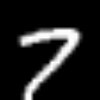

In [98]:
to_image = transforms.ToPILImage()
resize = transforms.Resize((100,100))
print(sample_y)
resize(to_image(sample_X))


In [99]:
sample_X

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [100]:
import torch
#Check if the data is preprocessed and normalized

print('Shape:' ,sample_X.size())
print('Std:', torch.std_mean(sample_X))
print('Max:', torch.max(sample_X))
print('Min:', torch.min(sample_X))

Shape: torch.Size([1, 28, 28])
Std: (tensor(0.2991), tensor(0.1220))
Max: tensor(1.)
Min: tensor(0.)


## Data loading

In [101]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)

In [102]:
batch_X, batch_y = next(iter(train_loader))
print(batch_X.size())
print(batch_y.size())

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [103]:
batch_y

tensor([2, 2, 7, 6, 9, 6, 3, 4, 4, 2, 6, 8, 7, 1, 6, 2, 6, 0, 2, 8, 7, 1, 0, 4,
        1, 6, 3, 5, 8, 1, 8, 0])

## Model

### Logistic regression model

In [104]:
import torch.nn as nn
# Using pytorch nn.Module class
class LogisticRegressionClassifier(nn.Module):
  def __init__(self, input_size, num_classes):
    super().__init__()

    self.linear = nn.Linear(input_size, num_classes)
    self.softmax = nn.Softmax(dim=-1)

  def forward(self, x):
    out = self.linear(x)
    out = self.softmax(out)
    return out

### MLP

In [105]:
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    #TODO
    #hint: use nn.ReLU() layer

  def forward(self,x):
    # TODO
    pass

In [106]:
# Test the MLP
# net = MLP(input_size=28*28, hidden_size = 100, num_classes=10)
# sample_input = torch.rand(1,784)
# net(sample_input)

## Model creation

In [107]:
# Pixels on input will be spreaded out
net = LogisticRegressionClassifier(input_size=28*28, num_classes=10)
net

LogisticRegressionClassifier(
  (linear): Linear(in_features=784, out_features=10, bias=True)
  (softmax): Softmax(dim=-1)
)

In [108]:
test_input = torch.rand(1, 784)

In [109]:
net(test_input)

tensor([[0.1736, 0.0615, 0.0618, 0.0513, 0.0978, 0.0516, 0.1667, 0.1347, 0.1051,
         0.0958]], grad_fn=<SoftmaxBackward0>)

In [118]:
batch_X, batch_y = next(iter(train_loader))
net(batch_X)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (896x28 and 784x10)

In [119]:
# Our data shape doesnt match the network input shape
batch_X.size()

torch.Size([32, 1, 28, 28])

In [120]:
batch_X = batch_X.reshape(-1,28*28)
batch_X.size()

torch.Size([32, 784])

In [121]:
net(batch_X)

tensor([[0.1405, 0.0779, 0.0804, 0.0961, 0.0958, 0.1034, 0.1031, 0.1049, 0.0946,
         0.1033],
        [0.1439, 0.0744, 0.0844, 0.1036, 0.0937, 0.0711, 0.1703, 0.0692, 0.1079,
         0.0816],
        [0.1228, 0.0850, 0.1011, 0.0945, 0.0793, 0.0858, 0.1289, 0.0893, 0.1167,
         0.0966],
        [0.1744, 0.0664, 0.1030, 0.0903, 0.0773, 0.1007, 0.0896, 0.1010, 0.1156,
         0.0818],
        [0.1479, 0.0874, 0.0868, 0.1197, 0.0898, 0.0859, 0.1121, 0.0947, 0.0905,
         0.0853],
        [0.1431, 0.1019, 0.0853, 0.0900, 0.0927, 0.0744, 0.1216, 0.1042, 0.0950,
         0.0918],
        [0.1125, 0.0787, 0.0854, 0.0988, 0.1084, 0.1027, 0.1252, 0.0971, 0.0920,
         0.0992],
        [0.1154, 0.0851, 0.1038, 0.1071, 0.0811, 0.1055, 0.1005, 0.1167, 0.0847,
         0.1000],
        [0.1482, 0.1003, 0.1101, 0.1010, 0.0796, 0.0916, 0.1005, 0.0896, 0.0954,
         0.0837],
        [0.1536, 0.0881, 0.0945, 0.0891, 0.0870, 0.0909, 0.1068, 0.0875, 0.1066,
         0.0960],
        [0

## Training

In [122]:
net = LogisticRegressionClassifier(input_size=784, num_classes=10)

In [123]:
loss_function = nn.CrossEntropyLoss() # Applies LogSoftmax internally
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [124]:
from torchmetrics import Accuracy

accuracy_function = Accuracy(task='multiclass', num_classes=10)

In [125]:
num_epochs=3
for epoch in range(num_epochs):
  for batch_idx ,(images,labels) in enumerate(train_loader):
    images = images.reshape(-1,784)

    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (batch_idx) % 250 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Accuracy: %.4f'
        %(epoch+1, num_epochs, batch_idx, len(train_loader.dataset)//images.size()[0], loss.item(), accuracy_function(outputs,labels)))


Epoch [1/3], Step [0/1875], Loss: 2.3056, Accuracy: 0.1562
Epoch [1/3], Step [250/1875], Loss: 1.7066, Accuracy: 0.8750
Epoch [1/3], Step [500/1875], Loss: 1.6588, Accuracy: 0.8125
Epoch [1/3], Step [750/1875], Loss: 1.5832, Accuracy: 0.9062
Epoch [1/3], Step [1000/1875], Loss: 1.6484, Accuracy: 0.8438
Epoch [1/3], Step [1250/1875], Loss: 1.7033, Accuracy: 0.8438
Epoch [1/3], Step [1500/1875], Loss: 1.6091, Accuracy: 0.8438
Epoch [1/3], Step [1750/1875], Loss: 1.6142, Accuracy: 0.8750
Epoch [2/3], Step [0/1875], Loss: 1.5605, Accuracy: 0.9062
Epoch [2/3], Step [250/1875], Loss: 1.6061, Accuracy: 0.9062
Epoch [2/3], Step [500/1875], Loss: 1.6323, Accuracy: 0.8125
Epoch [2/3], Step [750/1875], Loss: 1.5466, Accuracy: 0.9688
Epoch [2/3], Step [1000/1875], Loss: 1.5981, Accuracy: 0.8750
Epoch [2/3], Step [1250/1875], Loss: 1.5736, Accuracy: 0.9688
Epoch [2/3], Step [1500/1875], Loss: 1.5138, Accuracy: 0.9688
Epoch [2/3], Step [1750/1875], Loss: 1.5740, Accuracy: 0.9375
Epoch [3/3], Step [0

In [126]:
from tqdm import tqdm
def get_accuracy(model, loader):
  model.eval()
  all_predictions = []
  all_labels = []
  with torch.no_grad(): #Uses less GPU memory and is faster
    for images,labels in tqdm(loader):
      images = images.reshape(-1,28*28)
      labels = labels

      output = model(images)
      all_predictions.append(output)
      all_labels.append(labels)

  #torch.cat concats tensors along new dimension
  print('Accuracy:', accuracy_function(torch.cat(all_predictions), torch.cat(all_labels)).item())

In [127]:
get_accuracy(net, train_loader)

100%|██████████| 1875/1875 [00:09<00:00, 197.34it/s]

Accuracy: 0.9234499931335449


## Testing

In [128]:
test_data = dsets.MNIST(root = './data', train = False, transform = transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = 128, shuffle = False)

print(test_data.__len__())


10000


In [129]:
get_accuracy(net, test_loader)

100%|██████████| 79/79 [00:01<00:00, 52.61it/s]

Accuracy: 0.9240000247955322


In [ ]:
# Exercise: Solve the problem with MLP

# Solutions


################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

### MLP task solution (Spoiler inside!)

In [130]:
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, num_classes),
        # nn.Softmax(dim=-1), # the nn.CrossEntropyLoss() function applies LogSoftmax internally, so no softmax necessery!
    )
  def forward(self,x):
    return self.net(x)